# 時間型資料之特徵工程

作業程式碼
本範例將使用 UCI 資料平台中的 Beijing PM2.5 Data 提供的資料集，連結如下：https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data 

請完成以下數個技巧的操作：
1. 透過 Linear Regression 補值
2. 透過 差補法 補植
3. 差分（Differencing）
4. 移動平均（Moving Average）

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 輸入資料

In [86]:
# 輸入資料 
raw_data = pd.read_csv("C:/Users/Orianna/Desktop/Marathon/PRSA_data_2010.1.1-2014.12.31.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [87]:
raw_data.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [88]:
raw_data['pm2.5']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
43819     8.0
43820    10.0
43821    10.0
43822     8.0
43823    12.0
Name: pm2.5, Length: 43824, dtype: float64

## 目標一：透過 Linear Regression 把 pm2.5 欄位進行補值

In [89]:
copydata1=raw_data.copy()
copydata1['pm2.5'] = copydata1['pm2.5'].interpolate(method='linear', limit_direction='both')

In [90]:
print(copydata1['pm2.5'].isna().sum())

0


## 目標二：透過 差補法 把 pm2.5 欄位進行補值

In [91]:
copydata2=raw_data.copy()
copydata2['pm2.5']=copydata2['pm2.5'].ffill()

In [92]:
print(copydata2['pm2.5'].isna().sum())

24


## 目標三：挑選其中一個數值欄位，進行三階差分、五階差分，並分別繪製出原始資料與差分後資料的折線圖

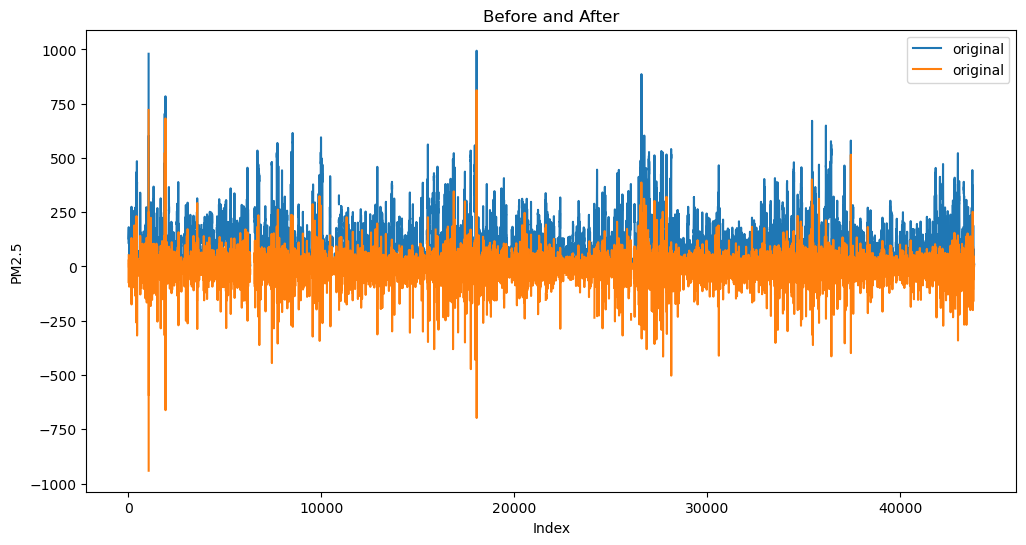

In [93]:
copydata3=raw_data.copy()
copydata3['pm2.5_diff3']=copydata3['pm2.5'].diff(periods=3)
plt.figure(figsize=(12,6))
plt.plot(raw_data['pm2.5'],label='original')
plt.plot(copydata3['pm2.5_diff3'],label='original')
plt.legend()
plt.title('Before and After')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

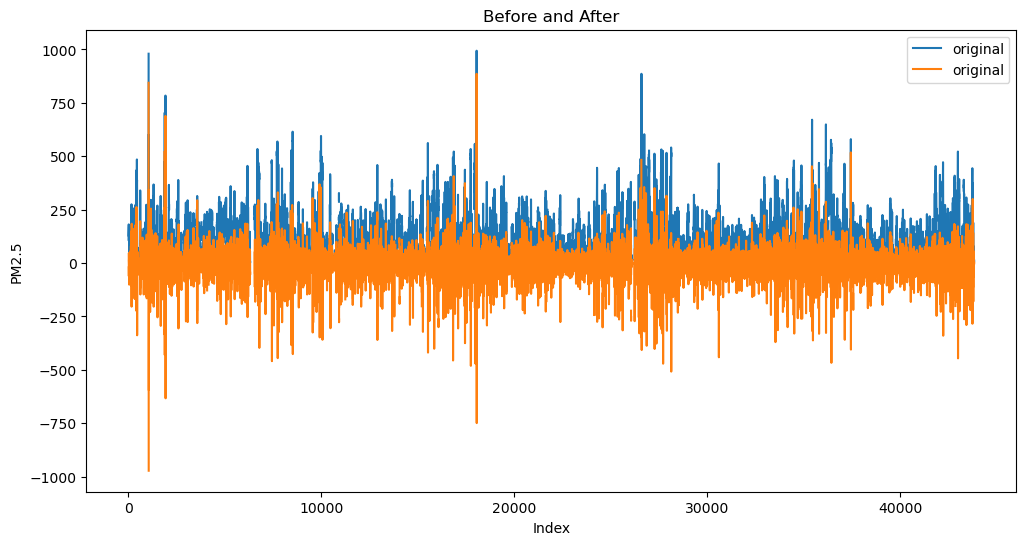

In [94]:
copydata3=raw_data.copy()
copydata3['pm2.5_diff5']=copydata3['pm2.5'].diff(periods=5)
plt.figure(figsize=(12,6))
plt.plot(raw_data['pm2.5'],label='original')
plt.plot(copydata3['pm2.5_diff5'],label='original')
plt.legend()
plt.title('Before and After')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

#較小階數差分（3 階）主要強調「短期」內的波動。
#較大階數差分（5 階）則強調「中期／較長期」的變化，會把更多的長期趨勢成分去掉，讓你更容易觀察到中間的段落起伏。

## 目標四：挑選其中一個數值欄位，進行移動平均，window 分別為 3 跟 6，並分別繪製出原始資料與差分後資料的折線圖

In [ ]:
copydata4=raw_data.copy()
copydata4['pm2.5_rolling']=copydata4['pm2.5'].rolling(window=3).mean()

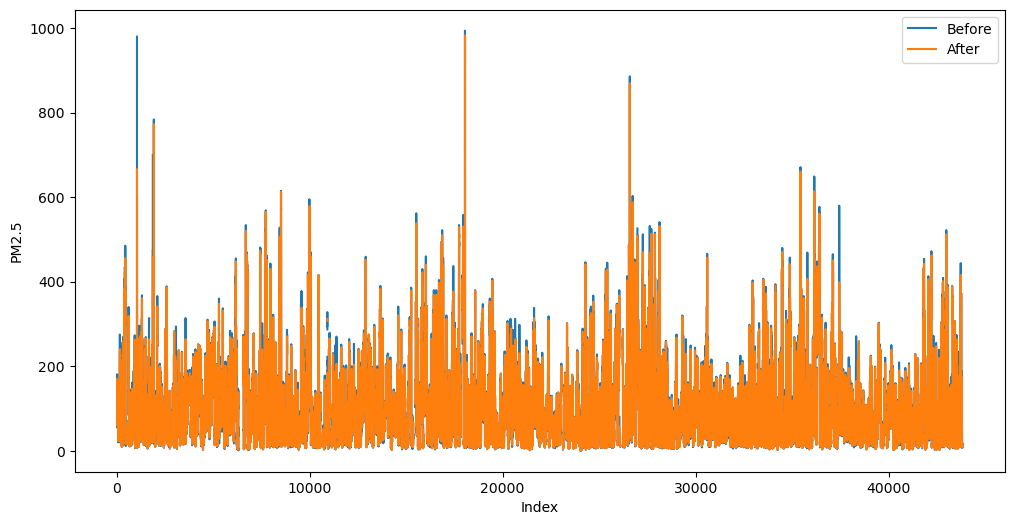

In [96]:
plt.figure(figsize=(12,6))
plt.plot(copydata4['pm2.5'], label='Before')
plt.plot(copydata4['pm2.5_rolling'], label='After')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

In [ ]:
copydata5=raw_data.copy()
copydata5['pm2.5_rolling']=copydata5['pm2.5'].rolling(window=6).mean()

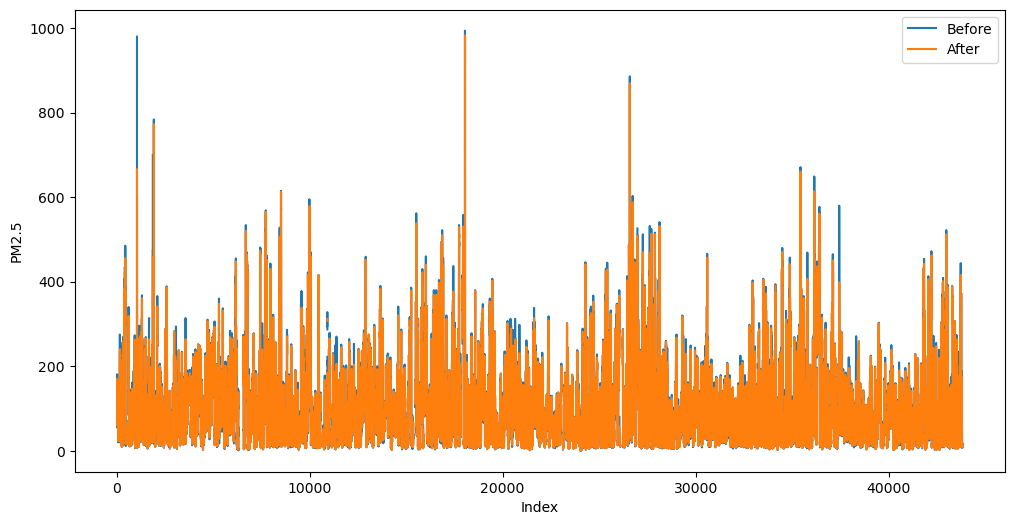

In [98]:
plt.figure(figsize=(12,6))
plt.plot(copydata5['pm2.5'], label='Before')
plt.plot(copydata5['pm2.5_rolling'], label='After')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()